# Домашнее задание 2
###Выполнила Косарева Екатерина (DS-22)

В этом задании вам необходимо:

1. Реализовать t-критерий Стьюдента для 2 независимых выборок при условии неизвестной дисперсии. Необходимо считать значение статистики и p_value для разных видов гипотез (двусторонняя, односторонние), а также результат (отвергается нулевая гипотеза или нет). Сравнить результаты с реализацией в scipy.stats.ttest_ind.

2. Реализовать bootstrap для оценки (через доверительные интервалы) медианных и средних значений распределений. Рассчитать для распределений: нормальное, экспоненциальное, смесь нормальных

3. Рассчитать мощность критерия для t-критерия и критерия Манна-Уитни для разных распределений и разном эффекте. Отдельно изучить случай, когда средние равны, а дисперсии сильно отличаются.

4. Оценить корректность t-критерия и критерия Манна-Уитни на разных распределениях.


In [ ]:
import numpy as np

##1. Создадим 2 независимые выборки

In [ ]:
import scipy.stats as sps

n = 1000

first = sps.norm.rvs(loc=0.9, scale=2.2, size=n)
second = sps.norm.rvs(loc = 1, scale = 2, size=n)



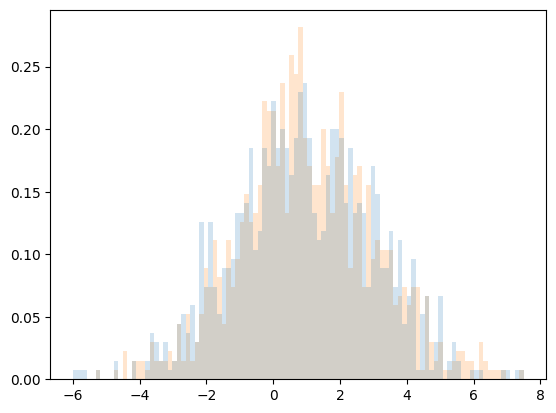

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

ax.hist([first, second], density=True, bins=100, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

Реализуем  t-критерий Стьюдента для 2 независимых выборок при условии неизвестной дисперсии. Для этого расчитаем выборочные средние значения и несмещенные оценки дисперсии

Для распределения стьюдента c 1999 степенями свободы и значением -0,754 p-value равно

            | one-tail  |  two-tail
    ---------------------------------
    p-value |  0.225469 | 0.450938


*рассчитано в онлайн калькуляторе

Можно воспользоваться функцией find_pval

In [ ]:
def find_pval(x, df, H_type="left"):
  flag = True
  p_val = 0
  eps = 0.001
  while flag:
    v =  sps.t.pdf(x, df)
    p_val += v*eps
    x = x - eps
    if v < 1e-4:
      flag = False
  if H_type == "left":
    return p_val
  return 2*p_val

In [ ]:
x1 = first.mean()
x2 = second.mean()
s1 = sum((first - x1) ** 2) / (n - 1)
s2 = sum((second - x2) ** 2) / (n - 1)
# s1 = first.std()
# s2 = second.std()
t_stat = (x1 - x2) / np.sqrt(s1/n + s2/n)

print(f"First dataset E = {x1}, sigma = {s1}")
print(f"Second dataset E = {x2}, sigma = {s2}")
print(f"T-Student value = {t_stat}")
print(f"Calculated p_val for left_side hypothisis  {find_pval(t_stat, 1999, H_type='left')}")
print(f"Calculated p_val for two_side hypothisis  {find_pval(t_stat, 1999, H_type='two_side')}")
print()

#p-value, то есть вероятность P(T>|t|)
#для односторонней гипотезы
print("ttest_ind results:")
ststistics_left = sps.ttest_ind(first, second, alternative= "less", equal_var=False)
print(f"Left-side t-Student = {ststistics_left.statistic}, p-value= {ststistics_left.pvalue}")

#для двусторонней гипотезы
ststistics_two = sps.ttest_ind(first, second, equal_var=False)
print(f"Two-side t-Student = {ststistics_two.statistic}, p-value= {ststistics_two.pvalue}")



First dataset E = 0.9286485155051917, sigma = 4.292760456470894
Second dataset E = 0.9977081324492988, sigma = 4.094633290252122
T-Student value = -0.7540682398124295
Calculated p_val for left_side hypothisis  0.22557527812401199
Calculated p_val for two_side hypothisis  0.45115055624802397

ttest_ind results:
Left-side t-Student = -0.7540682398124294, p-value= 0.2254485771918655
Two-side t-Student = -0.7540682398124294, p-value= 0.450897154383731


Так как полученное значение p-value > любого уровня достоверности 0,01, 0,05, 0,1, и для односторонней и для двусторонней гипотезы, то  гипотеза о том, что обе выборки происходят из нормального распределенных генеральных совокупностей с одинаковыми средними значениями, отклоняется

##2. Реализовать bootstrap для оценки (через доверительные интервалы) медианных и средних значений распределений. Рассчитать для распределений: нормальное, экспоненциальное, смесь нормальных

In [ ]:
import numpy as np

def bootstrap_sample_idx(size, n_samples):
  return np.random.randint(0, size, (n_samples, size))

def bootstrap_samples(data, n_samples):
  return data[bootstrap_sample_idx(len(data), n_samples)]


Для нормального распределения

In [ ]:
X = sps.norm.rvs(loc=1, scale=5, size=1000)
X_boost = bootstrap_samples(X, 100)


In [ ]:
def boot_CI(X_boost, alpha = 0.05):
  mean_metric = X_boost.mean()
  median_metric = np.median(X_boost)
  print(f"Normal distribution bootstrap mean = {mean_metric}, median = {median_metric}")

  CI_mean = np.percentile(X_boost.mean(axis=1), (alpha * 100, (1 - alpha) * 100))
  CI_median = np.percentile(np.median(X_boost, axis=1), (alpha * 100, (1 - alpha) * 100))
  print("Confidence interval for mean ", CI_mean)
  print("Confidence interval for median ", CI_median)


In [ ]:
boot_CI(X_boost, alpha = 0.05)

Normal distribution bootstrap mean = 1.0526471514333964, median = 1.1900828116338311
Confidence interval for mean  [0.80635919 1.30525405]
Confidence interval for median  [0.83828619 1.4328989 ]


Для экспаненциального распределения

In [ ]:
X = sps.expon.rvs(loc = 10, size=1000)
X_boost_exp = bootstrap_samples(X, 100)


In [ ]:
boot_CI(X_boost_exp, alpha = 0.05)

Normal distribution bootstrap mean = 10.977610155019015, median = 10.704647154861767
Confidence interval for mean  [10.93230266 11.0283904 ]
Confidence interval for median  [10.65081934 10.75777553]


Для смеси нормальных распределений

In [ ]:
X = np.append(
    sps.norm.rvs(loc = 10, scale=23, size=500),
    sps.norm.rvs(loc = -5, scale=10, size=500))

X_boost_mix = bootstrap_samples(X, 100)


In [ ]:
boot_CI(X_boost_mix, alpha = 0.05)

Normal distribution bootstrap mean = 2.396197695109578, median = -1.2858331835061665
Confidence interval for mean  [1.16129732 3.42371558]
Confidence interval for median  [-2.15554774  0.05390076]


##3. Рассчитать мощность критерия для t-критерия и критерия Манна-Уитни для разных распределений и разном эффекте. Отдельно изучить случай, когда средние равны, а дисперсии сильно отличаются.

In [ ]:
def criterion_power(df: dict = {'df':"norm", "loc":1, "scale":2}, size=1000, effect=1, alpha=0.05, test='student', equal_var=True):
  if df['df'] == "norm":
    dist = sps.norm
  if df['df'] == "exp":
    dist = sps.expon
  if df['df'] == "bernoulli":
    dist = sps.bernoulli

  p_val = []
  if not equal_var:
    delta = 10
  else:
    delta = 0
  for i in range(1000):
    if df['df'] == "bernoulli":
      x_a = dist.rvs(p = 0.25, size=size)
      x_b = dist.rvs(p = 0.25 + effect / 5, size=size)
    else:
      x_a = dist.rvs(loc = df["loc"], scale=df["scale"] + delta, size=size)
      x_b = dist.rvs(loc = df["loc"] + effect, scale=df["scale"] + delta, size=size)

    if test == 'mann':
      p_val.append(sps.mannwhitneyu(x_a, x_b).pvalue)
    else:
      p_val.append(sps.ttest_ind(x_a, x_b, equal_var=equal_var).pvalue)

  p_val = np.array(p_val)
  print(f"Criterion power is {p_val[p_val < alpha].shape[0] / p_val.shape[0] * 100}")
  print()
  return(p_val)


In [ ]:
print("T-student:")
for dist in ["norm", "exp", "bernoulli"]:
  for effect in [0.1, 0.5, 1, 2]:
    print(f"Distribution {dist}, effect={effect}:")
    criterion_power({'df':dist, "loc":0.5, "scale":3}, size=100, effect=effect, alpha=0.01, test='student', equal_var=True)
print("Equal avreges and different std")
criterion_power({'df':"norm", "loc":0.5, "scale":3}, size=1000, effect=0, alpha=0.05, test='student', equal_var=False)

print('========================================================================')
print("Mann-Whitney:")
for dist in ["norm", "exp", "bernoulli"]:
  for effect in [0.1, 0.5, 1, 2]:
    print(f"Distribution {dist}, effect={effect}:")
    criterion_power({'df':dist, "loc":0.5, "scale":3}, size=1000, effect=effect, alpha=0.05, test='mann', equal_var=True)
print("Equal avreges and different std")
criterion_power({'df':"norm", "loc":0.5, "scale":3}, size=1000, effect=0, alpha=0.05, test='mann', equal_var=False)


T-student:
Distribution norm, effect=0.1:
Criterion power is 1.0

Distribution norm, effect=0.5:
Criterion power is 6.7

Distribution norm, effect=1:
Criterion power is 38.7

Distribution norm, effect=2:
Criterion power is 97.89999999999999

Distribution exp, effect=0.1:
Criterion power is 1.0999999999999999

Distribution exp, effect=0.5:
Criterion power is 9.9

Distribution exp, effect=1:
Criterion power is 40.699999999999996

Distribution exp, effect=2:
Criterion power is 97.89999999999999

Distribution bernoulli, effect=0.1:
Criterion power is 1.2

Distribution bernoulli, effect=0.5:
Criterion power is 14.799999999999999

Distribution bernoulli, effect=1:
Criterion power is 65.9

Distribution bernoulli, effect=2:
Criterion power is 100.0

Equal avreges and different std
Criterion power is 6.0

Mann-Whitney:
Distribution norm, effect=0.1:
Criterion power is 11.899999999999999

Distribution norm, effect=0.5:
Criterion power is 95.7

Distribution norm, effect=1:
Criterion power is 100.

array([2.60255055e-01, 4.99326054e-01, 7.09694115e-04, 2.69211758e-01,
       3.69372523e-01, 9.49090035e-01, 2.67875839e-02, 2.93729868e-01,
       8.58164891e-03, 1.54241600e-01, 1.87634859e-01, 4.60534243e-01,
       7.69525660e-01, 8.95231674e-01, 4.82464108e-01, 4.28484043e-01,
       8.05990387e-01, 8.92598292e-01, 1.61627912e-01, 4.86189644e-01,
       1.71353741e-01, 8.60428897e-01, 4.28619541e-01, 8.47731829e-01,
       1.44881192e-01, 2.65238429e-01, 6.74996491e-01, 1.49483638e-01,
       1.56018494e-01, 7.54123149e-01, 5.22068379e-01, 2.37293863e-01,
       6.63772085e-01, 9.91998533e-01, 9.20456046e-01, 1.10643134e-01,
       2.14341129e-01, 4.93296156e-01, 2.29157537e-01, 3.66817529e-01,
       6.69346854e-01, 3.38504922e-01, 7.02135791e-01, 3.39052360e-01,
       5.83687544e-01, 2.27244255e-01, 3.92305186e-01, 4.22950119e-01,
       9.01176292e-01, 2.97592122e-01, 3.29246992e-01, 3.96173630e-01,
       3.77103671e-01, 4.89200697e-01, 3.60681804e-01, 3.04144801e-02,
      

Видим, что с увеличением эффекта мощность критерия растет для всех распределений и для обоих критериев.

Для нормального распределения при одинаковых средних и разных стандартных отклонениях, мощность критерия очень низкая.

##4 Оценить корректность t-критерия и критерия Манна-Уитни на разных распределениях.

In [ ]:
def calc_probs(pval):
  probs = []
  x = [1/len(pval)*i for i in range(1, len(pval) + 1)]

  for i in range(1, len(pval) + 1):
    alpha_step = 1 / len(pval) * i
    probs.append(pval[pval < alpha_step].shape[0] / pval.shape[0])
  plt.scatter(x, np.array(probs))
  plt.plot(x, x, c='r')
  plt.show()



T-student:
Distribution norm, effect=0.1:
Criterion power is 1.0999999999999999



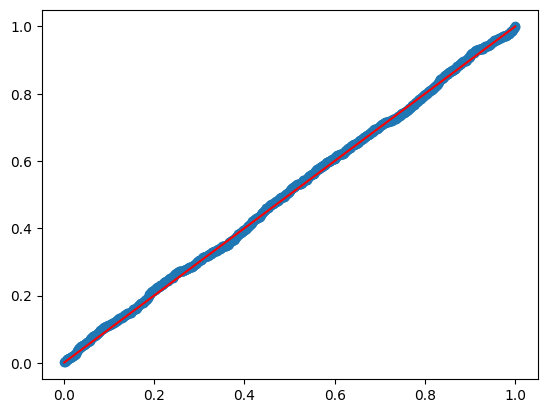

Distribution norm, effect=1:
Criterion power is 41.099999999999994



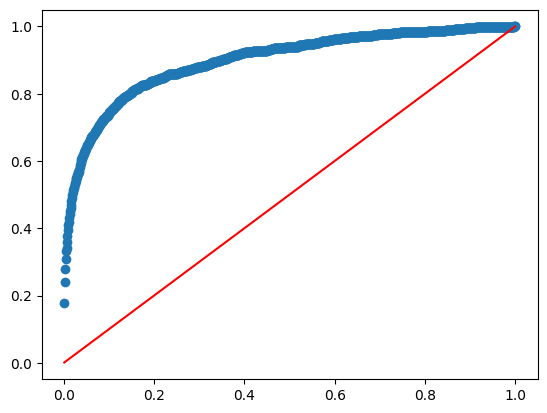

Distribution norm, effect=1.5:
Criterion power is 81.0



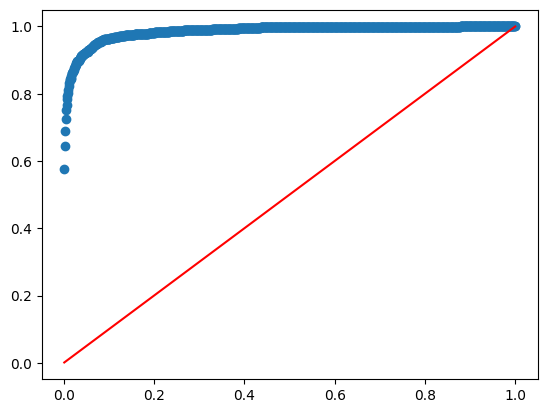

Distribution norm, effect=2:
Criterion power is 98.4



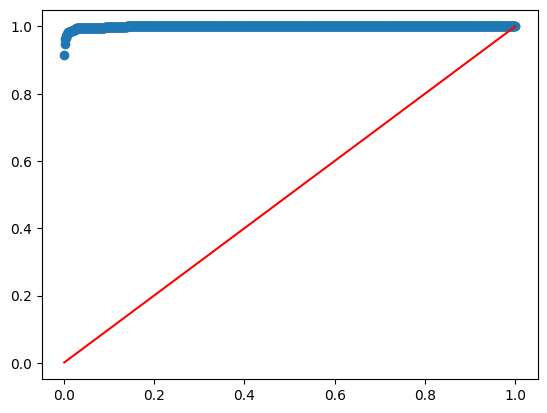

Distribution exp, effect=0.1:
Criterion power is 1.0999999999999999



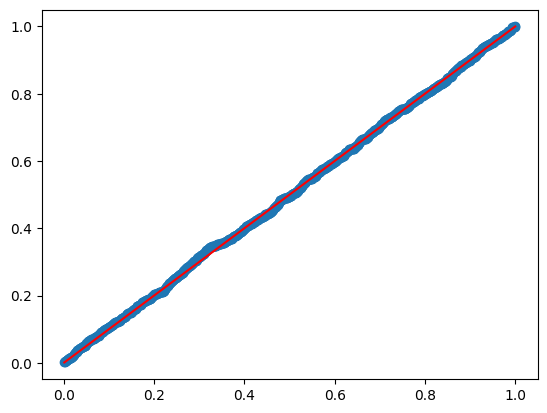

Distribution exp, effect=1:
Criterion power is 42.199999999999996



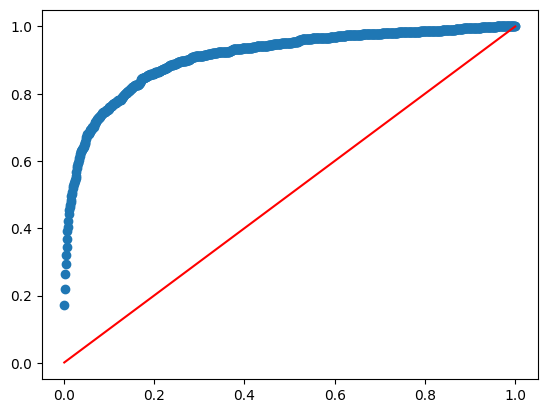

Distribution exp, effect=1.5:
Criterion power is 83.2



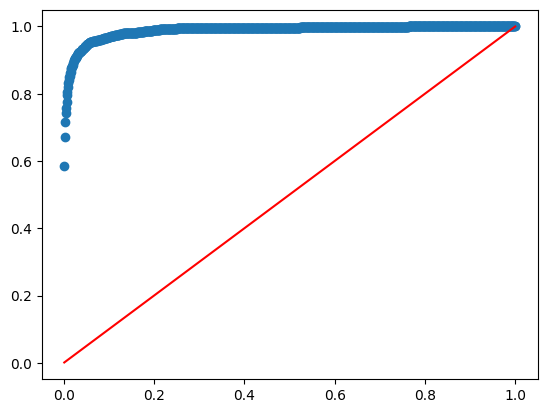

Distribution exp, effect=2:
Criterion power is 98.0



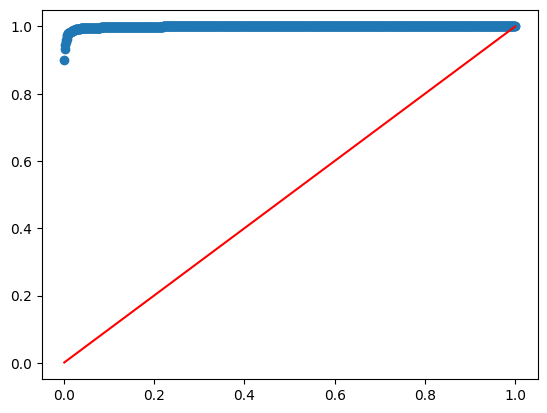

Distribution bernoulli, effect=0.1:
Criterion power is 1.7000000000000002



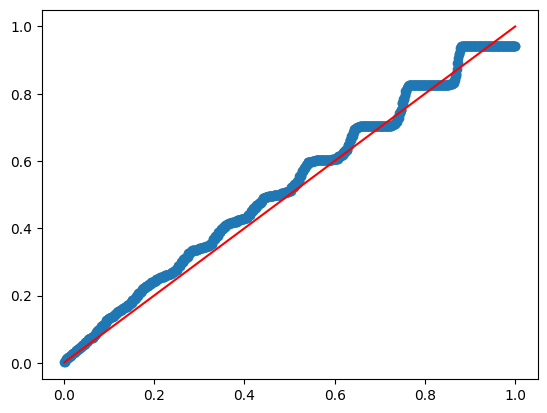

Distribution bernoulli, effect=1:
Criterion power is 65.8



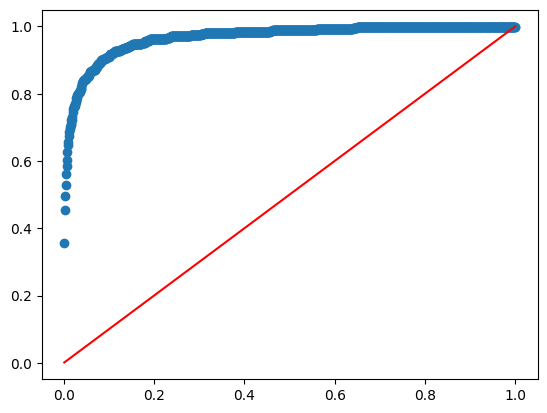

Distribution bernoulli, effect=1.5:
Criterion power is 96.7



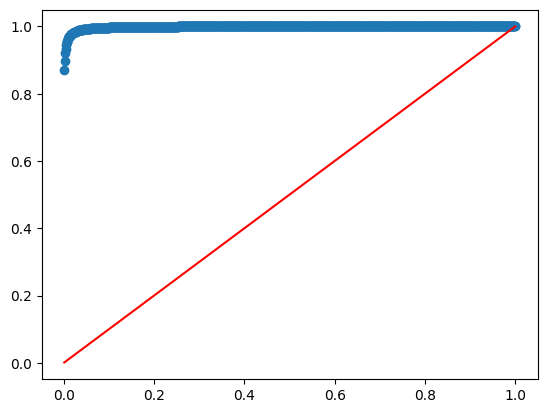

Distribution bernoulli, effect=2:
Criterion power is 100.0



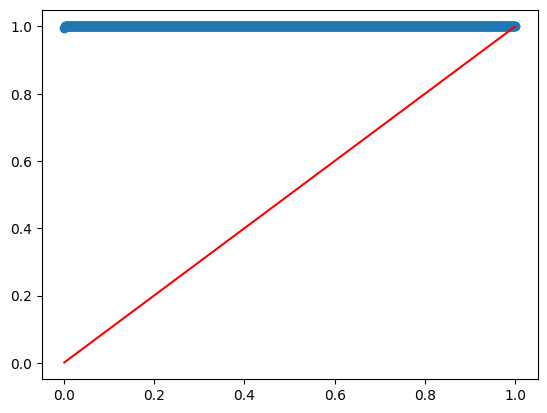

Equal avreges and different std
Criterion power is 5.6000000000000005



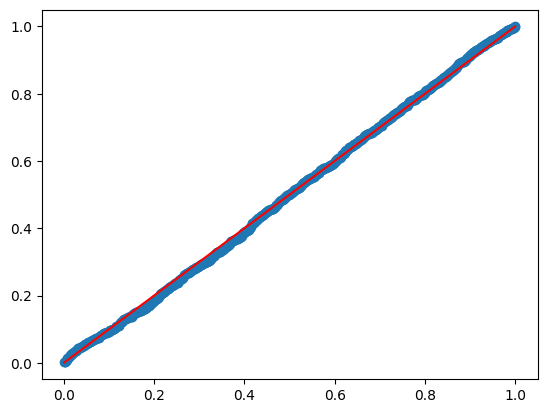

Mann-Whitney:
Distribution norm, effect=0.1:
Criterion power is 12.4



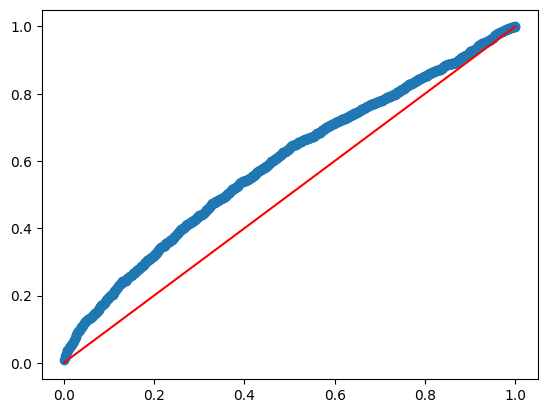

Distribution norm, effect=0.5:
Criterion power is 95.8



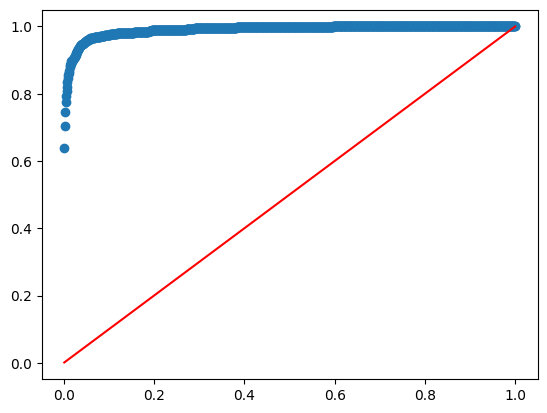

Distribution norm, effect=1:
Criterion power is 100.0



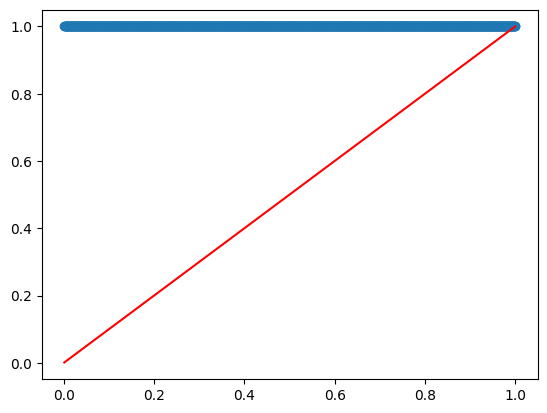

Distribution norm, effect=2:
Criterion power is 100.0



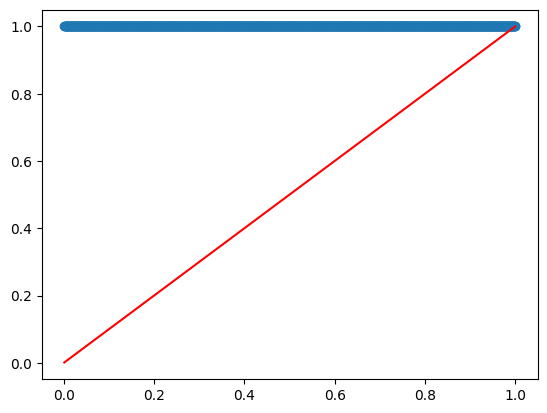

Distribution exp, effect=0.1:
Criterion power is 23.9



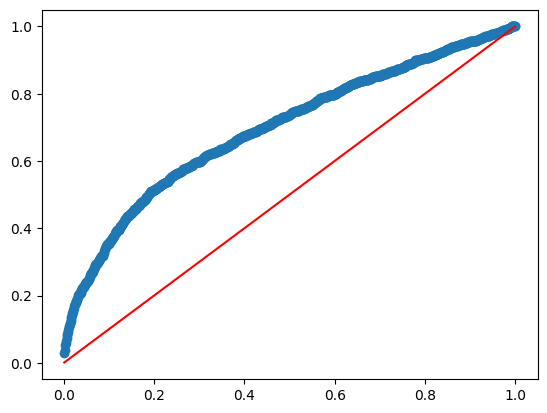

Distribution exp, effect=0.5:
Criterion power is 100.0



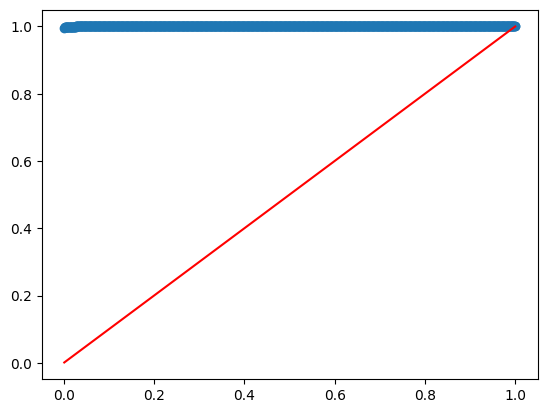

Distribution exp, effect=1:
Criterion power is 100.0



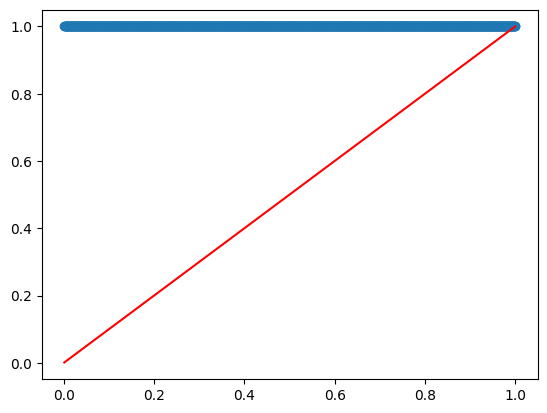

Distribution exp, effect=2:
Criterion power is 100.0



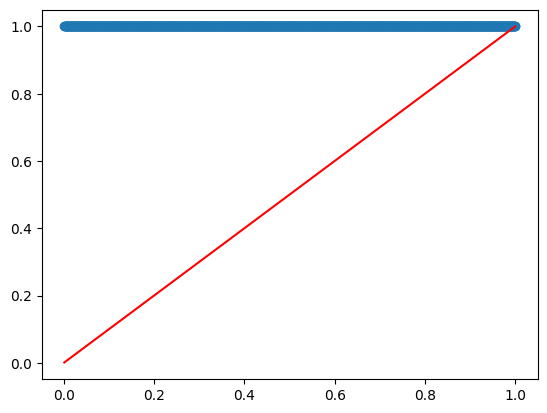

Distribution bernoulli, effect=0.1:
Criterion power is 15.9



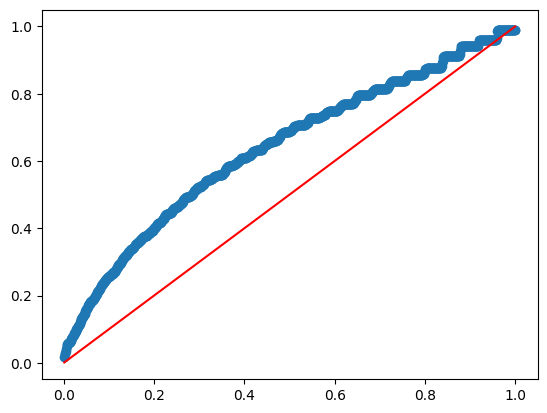

Distribution bernoulli, effect=0.5:
Criterion power is 99.8



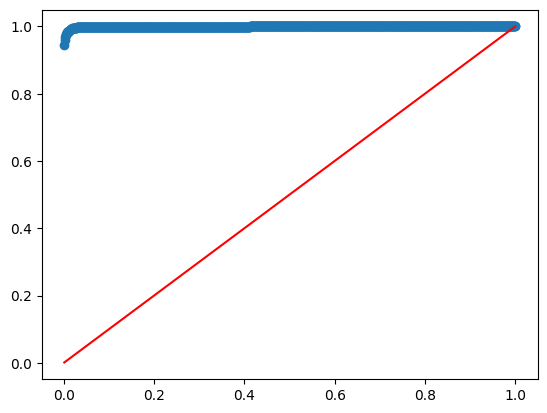

Distribution bernoulli, effect=1:
Criterion power is 100.0



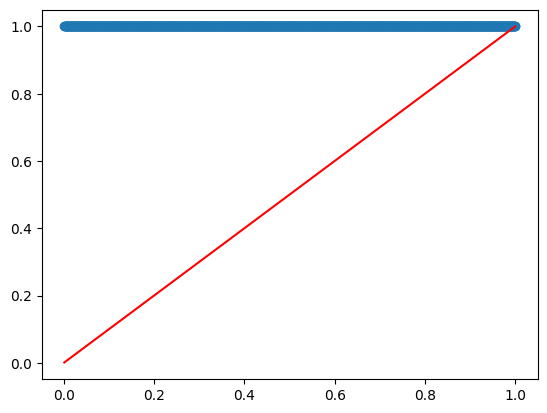

Distribution bernoulli, effect=2:
Criterion power is 100.0



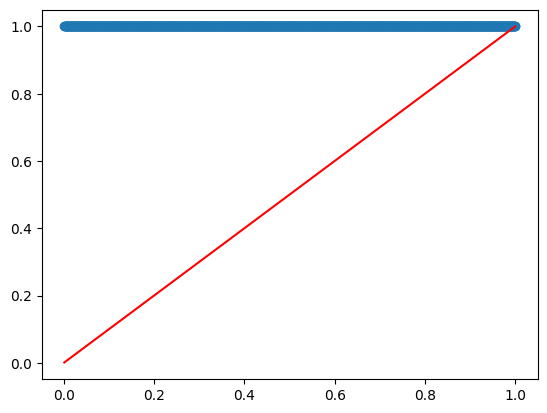

Equal avreges and different std
Criterion power is 5.8999999999999995



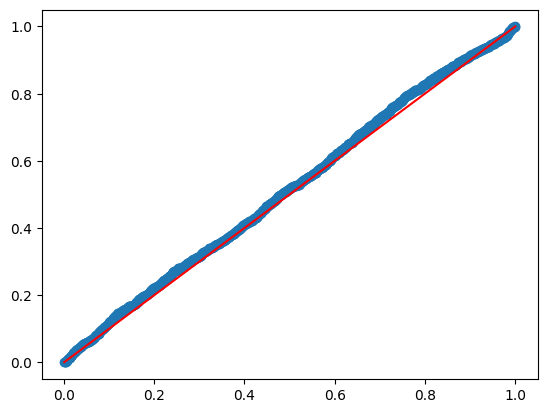

In [ ]:
x = [0.001*i for i in range(1, 1001)]

print("T-student:")
for dist in ["norm", "exp", "bernoulli"]:
  for effect in [0.1, 1, 1.5, 2]:
    print(f"Distribution {dist}, effect={effect}:")
    p_values = criterion_power({'df':dist, "loc":0.5, "scale":3}, size=100, effect=effect, alpha=0.01, test='student', equal_var=True)
    probs = calc_probs(p_values)

print("Equal avreges and different std")
p_values = criterion_power({'df':"norm", "loc":0.5, "scale":3}, size=1000, effect=0, alpha=0.05, test='student', equal_var=False)
probs = calc_probs(p_values)

print('========================================================================')
print("Mann-Whitney:")
for dist in ["norm", "exp", "bernoulli"]:
  for effect in [0.1, 0.5, 1, 2]:
    print(f"Distribution {dist}, effect={effect}:")
    p_values = criterion_power({'df':dist, "loc":0.5, "scale":3}, size=1000, effect=effect, alpha=0.05, test='mann', equal_var=True)
    probs = calc_probs(p_values)

print("Equal avreges and different std")
p_values = criterion_power({'df':"norm", "loc":0.5, "scale":3}, size=1000, effect=0, alpha=0.05, test='mann', equal_var=False)
probs = calc_probs(p_values)



Из графиков видно, что чем мощнее критерий, тем выше кривая вероятностей над красной прямой. Т.е. чем сильнее разница между двумя выборками, тем выше способность критерия обнаружить эффект, в случае если этот эффект действительно существует. С точки зрения статистики, это вероятность справедливого опровержения нулевой гипотезы.